dimension = number of features

# K - means clustering

In [2]:
import pandas as pd
import numpy as np
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
samples

,year,pop,areaa
0,1950,2.519,1009
1,1970,3.692,455
2,1990,5.263,789
3,2010,6.972,170
4,2050,8.940,344
5,2100,10.850,767


In [17]:
new_samples =pd.DataFrame({
    'year': [1950, 1950, 1940, 2010, 2090, 2100],
    'pop': [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85],
    'areaa': [342, 677, 399, 200, 1898, 767]
})

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

# labels = fit_predict(samples)

labels

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 1, 0])

In [19]:
new_labels = model.predict(new_samples)
new_labels

array([1, 0, 1, 1, 2, 0])

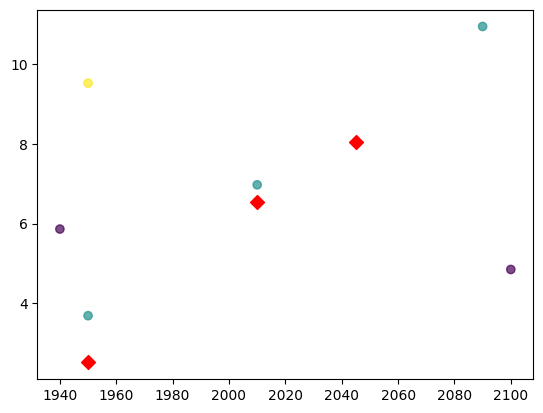

In [27]:
import matplotlib.pyplot as plt
year=[1950, 1950, 1940, 2010, 2090, 2100]
pop = [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]
plt.scatter(year,pop, c = labels, alpha = 0.7) # print with cluster as labers

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', s=50) # s =size, marker = Dimond
plt.show()

# Evaluating a clustering

In [33]:
species = ['two', 'two','zero', 'one', 'zero', 'zero']
labels_species = pd.DataFrame({'labels': labels, 'species' : species})
labels_species

,labels,species
0,2,two
1,1,two
2,0,zero
3,1,one
4,1,zero
5,0,zero


In [34]:
ct = pd.crosstab(labels_species['labels'],labels_species['species']) 
ct

species,one,two,zero
labels,,,
0,0,0,2
1,1,1,1
2,0,1,0


In [35]:
# inertia (bezwładność), how far away the values are from centroids
model.inertia_
# the number of clusters has impact on it
# elbow on inertia plot

50795.66492716667

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will

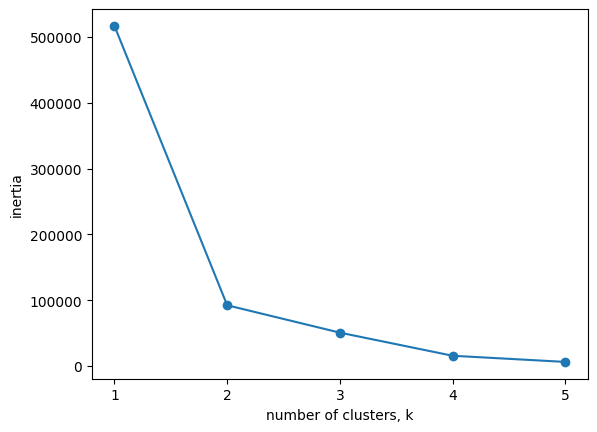

In [36]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Feature variance
Should be the same for each feature in Kmeans

In [37]:
wine = pd.read_csv('wine.csv')

In [38]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
wine_df = wine.iloc[:,2:15]
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
w_model = KMeans(n_clusters = 3)
w_model.fit(wine_df)
w_labels = w_model.predict(wine_df)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
ct = pd.crosstab(w_labels,wine['class_name']) 
ct

class_name,Barbera,Barolo,Grignolino
row_0,,,
0,19,0,50
1,0,46,1
2,29,13,20


### StandardScaler
- mean = 0, variance = 1
- changes each column 
- It arranges the data in a standard normal distribution. 
- It is more useful in classification than regression

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_df)
StandardScaler(copy = True, with_mean = True, with_std = True)
samples_scaled = scaler.transform(wine_df)

In [45]:
# pipeline
from sklearn.pipeline import make_pipeline

model = KMeans(n_clusters = 3)
scaler = StandardScaler()

pipeline = make_pipeline(scaler,model)
pipeline.fit(wine_df)
w_pipe_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipe_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,0,59,3
1,0,0,65
2,48,0,3


### Normalizer
- It squeezes the data between 0 and 1. 
- changes each row 
- Is more useful in regression than classification

In [46]:
from sklearn.preprocessing import Normalizer 

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 3)

pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(wine_df)
w_pipen_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipen_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,40,8,33
1,4,0,33
2,4,51,5


# Hierarchical clustering
- The y-axis of the dendrogram encodes the distance between merging clusters
- "linkage method": "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples.

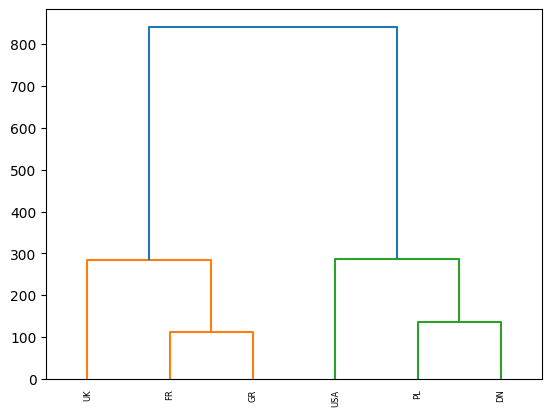

In [6]:
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
species = ['UK', 'PL','FR', 'USA', 'DN', 'GR']

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
mergins = linkage(samples, method = "complete")

dendrogram(mergins, labels=species, leaf_rotation = 90, leaf_font_size = 6 )

plt.show()

In [19]:
labels = fcluster(mergins, 130,  criterion = 'distance')
pairs = pd.DataFrame({'labels':labels, 'countries':species})
print(pairs.sort_values('labels').reset_index())

   index  labels countries
0      2       1        FR
1      5       1        GR
2      0       2        UK
3      1       3        PL
4      4       4        DN
5      3       5       USA


In [18]:
ct = pd.crosstab(pairs['labels'],pairs['countries'])
ct

countries,DN,FR,GR,PL,UK,USA
labels,,,,,,
1,0,1,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,1


# t-SNE
- It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized

In [32]:
samples.values

array([[1950.   ,    2.519, 1009.   ],
       [1970.   ,    3.692,  455.   ],
       [1990.   ,    5.263,  789.   ],
       [2010.   ,    6.972,  170.   ],
       [2050.   ,    8.94 ,  344.   ],
       [2100.   ,   10.85 ,  767.   ]])

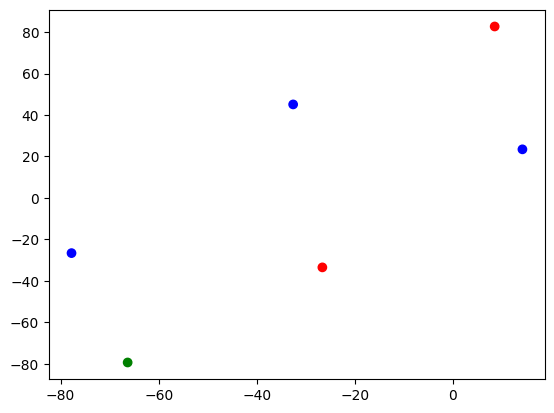

In [41]:
species = ['red', 'red','blue', 'green', 'blue', 'blue']
from sklearn.manifold import TSNE
model_t = TSNE(perplexity=4,learning_rate = 100)
transformed = model_t.fit_transform(samples.values)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c= species )
plt.show()

# PCA -  "Principal Component Analysis", Dimension reduction
- PCA  shifts the samples so that they have mean zero
- the columns of the transformed array are not linearly correlated
- it learns the "principal components" (głowne skałdaniki) of the data

In [46]:
samples.iloc[:,0:2].values

array([[1950.   ,    2.519],
       [1970.   ,    3.692],
       [1990.   ,    5.263],
       [2010.   ,    6.972],
       [2050.   ,    8.94 ],
       [2100.   ,   10.85 ]])

In [47]:
samples_PCA= samples.iloc[:,0:2].values
from sklearn.decomposition import PCA
model_PCA = PCA()
model_PCA.fit(samples_PCA)
transformed_PCA = model_PCA.transform(samples_PCA)
transformed_PCA

array([[-61.78592698,  -0.35742418],
       [-41.75159665,  -0.31821751],
       [-21.69474124,   0.11835125],
       [ -1.63007564,   0.69269881],
       [ 38.41719187,   0.39371803],
       [ 88.44514863,  -0.5291264 ]])

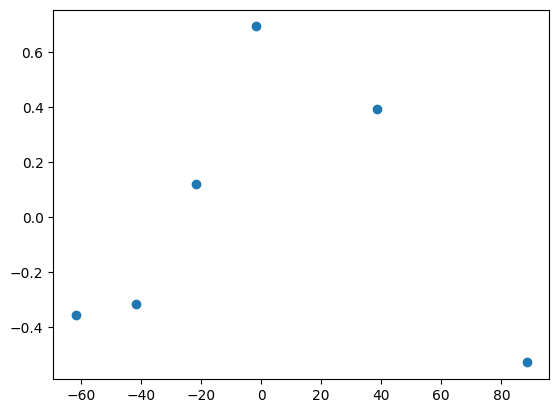

In [67]:
plt.scatter(transformed_PCA[:,0], transformed_PCA[:,1])
plt.show()

In [48]:
model_PCA.components_ # directions of component

array([[ 0.99839718,  0.05659566],
       [-0.05659566,  0.99839718]])

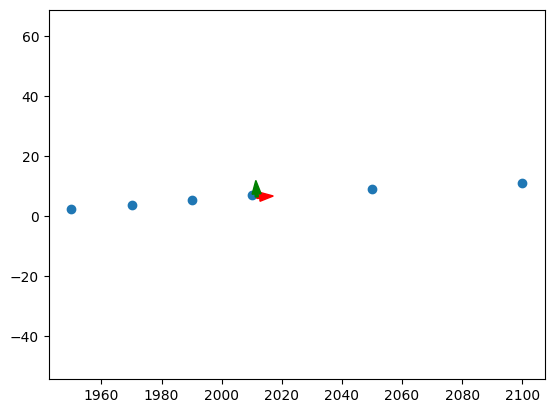

In [75]:
plt.scatter(samples_PCA[:,0], samples_PCA[:,1])
mean = model_PCA.mean_
second_pc = model_PCA.components_[1,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=1)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=1)
plt.axis('equal')
plt.show()

In [49]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(transformed_PCA[:,0], transformed_PCA[:,1])
print(correlation, pvalue)

-3.885780586188048e-16 0.9999999999999993


# Intrinsic dimension of PCA
- The intrinsic (wewnętrzny) dimension is the number of PCA features that have significant variance

In [62]:
pca_ID = PCA()
pca_ID.fit(samples.transpose().values)
features = range(pca_ID.n_components_)
features

range(0, 3)

In [63]:
pca_ID.explained_variance_

array([6.40097551e+06, 1.62089482e+05, 6.92346403e-26])

In [64]:
pca_ID.explained_variance_

array([6.40097551e+06, 1.62089482e+05, 6.92346403e-26])

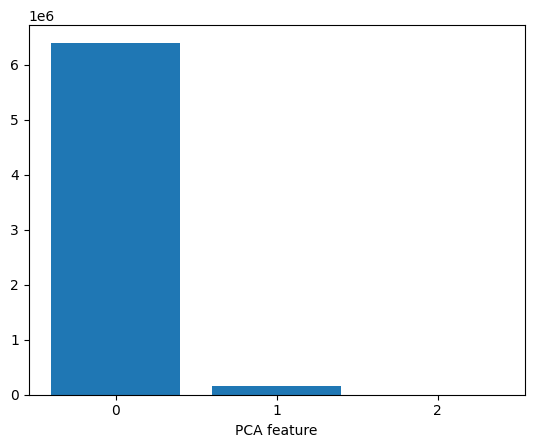

In [65]:
# Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the 
# principal components (eigenvectors) generated by the principal component analysis (PCA) method. 
# In other words, it tells us how much of the total variance is “explained” by each component.
plt.bar(features, pca_ID.explained_variance_)
plt.xticks(features)
plt.xlabel('variance')
plt.xlabel('PCA feature')
plt.show()

# Dimension reduction 

In [97]:
samples_DR =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767],
    'PKB': [30, 20, 50, 10, 120, 30]
})
species_DR = ['red', 'red','blue', 'green', 'blue', 'blue']
pca_4 = PCA(n_components = 4)
pca_4.fit(samples_DR)
transformed_DR = pca_4.transform(samples_DR)
transformed_DR.shape

(6, 4)

In [98]:
transformed_DR

array([[ 4.22136867e+02, -4.55123362e+01,  1.11578296e+01,
        -4.00159190e-02],
       [-1.31973117e+02, -5.27113885e+01, -6.93638119e+00,
         4.83813171e-01],
       [ 2.00513617e+02, -9.75590477e+00,  1.46339264e+01,
        -2.82853794e-01],
       [-4.18032838e+02, -3.04205781e+01, -3.15956504e+01,
        -3.12864771e-01],
       [-2.47510336e+02,  5.37580645e+01,  5.68112263e+01,
         4.71026288e-02],
       [ 1.74865806e+02,  8.46421431e+01, -4.40709507e+01,
         1.04818684e-01]])

In [99]:
pca_4.components_

array([[-0.03626907, -0.00318175,  0.99919089, -0.01708807],
       [ 0.92952791,  0.05188619,  0.04011145,  0.36287292],
       [-0.36288298, -0.01694122,  0.00270742,  0.93167677],
       [ 0.05457438, -0.99850423, -0.00114552,  0.00310336]])

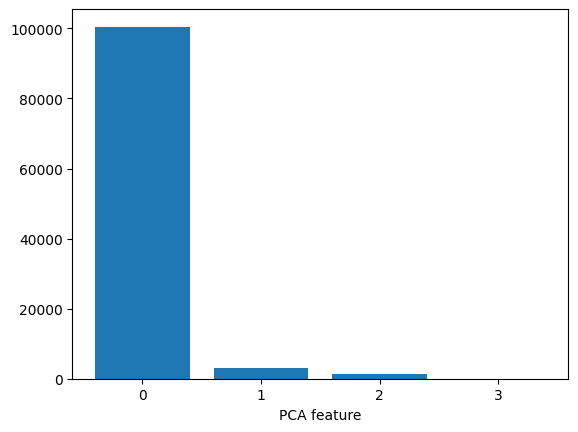

In [100]:
features_RD = range(pca_4.n_components_)
pca_4.explained_variance_
plt.bar(features_RD, pca_4.explained_variance_)
plt.xticks(features_RD)
plt.xlabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [101]:
pd.DataFrame(pca_4.components_, columns=samples_DR.columns,index = ['PC-1','PC-2', 'PC-3','PC-4'])

,year,pop,areaa,PKB
PC-1,-0.036269,-0.003182,0.999191,-0.017088
PC-2,0.929528,0.051886,0.040111,0.362873
PC-3,-0.362883,-0.016941,0.002707,0.931677
PC-4,0.054574,-0.998504,-0.001146,0.003103


In [102]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca_4.components_[i]).argmax() for i in range(pca_4.n_components_)]

initial_feature_names = ['year','pop','area','PKB']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca_4.n_components_)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca_4.n_components_)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
print(df)

     0     1
0  PC1  area
1  PC2  year
2  PC3   PKB
3  PC4   pop


In [104]:
pca_2 = PCA(n_components = 2)
pca_2.fit(samples_DR)
transformed_DR = pca_2.transform(samples_DR)
transformed_DR.shape

(6, 2)

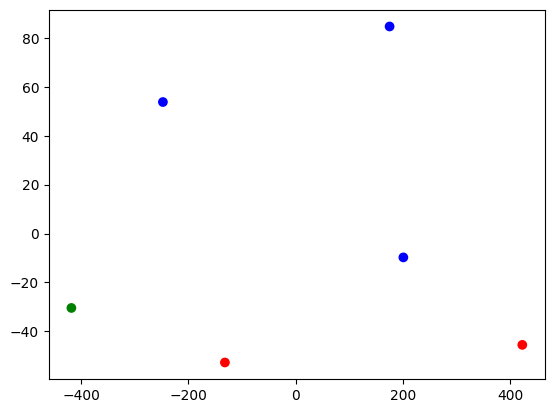

In [107]:
xs = transformed_DR[:,0]
ys = transformed_DR[:,1]
plt.scatter(xs, ys, c= species )
plt.show()

### TruncatedSVD and csr_matrix 
- csr_matrices save space by remembering only the non-zero entries of the array
- word-frequency array measure how often each word appears in each document

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# pca_T = TruncatedSVD(n_components = 2)
# pca_T.fit(document)
# transformed_T = pca_T.transform(document)

### tf-idf word frequency array 
create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.
- the frequency of each word in the document
- "tf" is the frequency of the word in the document
- "idf" is a weighting scheme that reduces the influence of frequent words like "the"

In [108]:
# # Import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TfidfVectorizer: tfidf
# tfidf = TfidfVectorizer() 

# # Apply fit_transform to document: csr_mat
# csr_mat = tfidf.fit_transform(documents)

# # Print result of toarray() method
# print(csr_mat.toarray())

# # Get the words: words
# words = tfidf.get_feature_names()

# # Print words
# print(words)

# Non-negative matrix factorization (NMF)
- In constract to PCA, however, NMF models are interpretable
- It is required that the sample features be "non-negative", so greater than or equal to 0. 

In [114]:
tf = np.array([[0.2, 0.3, 0.0, 0.1],
              [0.0, 0.0, 0.4, 0.1],
              [0.4, 0.3, 0.2, 0.1]])
tf

array([[0.2, 0.3, 0. , 0.1],
       [0. , 0. , 0.4, 0.1],
       [0.4, 0.3, 0.2, 0.1]])

In [116]:
from sklearn.decomposition import NMF
model_NMF = NMF(n_components =2)
model_NMF.fit(tf)
nmf_feautures = model_NMF.transform(tf)
nmf_feautures # 2 columns, as n_components = 2

array([[0.38841861, 0.        ],
       [0.        , 0.55781065],
       [0.5244715 , 0.26302724]])

In [118]:
model_NMF.components_

array([[0.66323691, 0.64296951, 0.01302556, 0.16365346],
       [0.03606107, 0.        , 0.7202388 , 0.15646267]])

### Reconstruction of a sample

In [122]:
tf[2,:]

array([0.4, 0.3, 0.2, 0.1])

In [123]:
nmf_feautures[2,:]

array([0.5244715 , 0.26302724])

In [125]:
# product of matrices = iloczyn macierzy
#m ultiplying components by feature values and add up (dot product)
new_s = (nmf_feautures[2,:].dot(model_NMF.components_))
new_s 

array([0.3573339 , 0.33721918, 0.19627396, 0.12698552])

In [126]:
# vector_a = 2 + 3j 
# vector_b = 4 + 5j

# now dot product 
# product = np.dot(vector_a, vector_b

# = 2(4 + 5j) + 3j(4 +5j) 
# = 8 + 10j + 12j - 15 
# = -7 + 22j

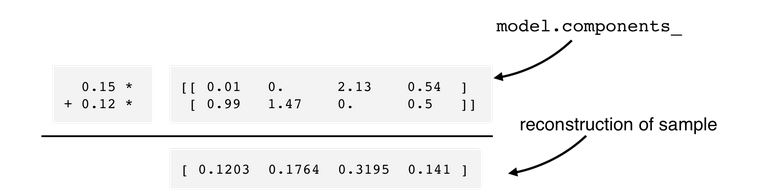

In [128]:
from PIL import Image 
from IPython.display import display
img = Image. open('reconstruction.jpg')
display(img)

### "grayscale image"
- An image in which all the pixels are shades of gray ranging from black to white

In [131]:
gray = np.round(np.random.uniform(low=0, high=1.1, size=(2,3)),1)
gray

array([[0.8, 0.1, 0.8],
       [1. , 0.7, 0.3]])

In [132]:
gray_flatten = gray.flatten()

array([0.8, 0.1, 0.8, 1. , 0.7, 0.3])

<function matplotlib.pyplot.show(close=None, block=None)>

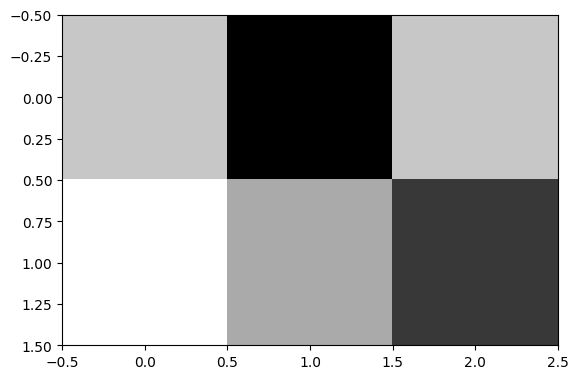

In [134]:
plt.imshow(gray, cmap= 'gray', interpolation= 'nearest')
plt.show

### finding the similar case by comparing cosin of each rows feautures
- the same cosin = the same subject, cloer to 0 point more bulshit article, higher score more strong article
- comparing 'CC' ---> 'DD' the most simillar

In [137]:
from sklearn.preprocessing import normalize
norm_feautures = normalize(nmf_feautures)
norm_feautures

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.89388695, 0.44829245]])

In [139]:
current_article = norm_feautures[2,:]
similarities = norm_feautures.dot(current_article)
similarities

array([0.89388695, 0.44829245, 1.        ])

In [153]:
titles = ['DD', "GG", "CC"]

In [154]:
df = pd.DataFrame(norm_feautures, index=titles)
df

,0,1
DD,1.000000,0.000000
GG,0.000000,1.000000
CC,0.893887,0.448292


In [159]:
current_artcle_2 = df.loc['CC']
si = df.dot(current_artcle_2)
si

DD    0.893887
GG    0.448292
CC    1.000000
dtype: float64

In [160]:
si.nlargest()

CC    1.000000
DD    0.893887
GG    0.448292
dtype: float64

### Pipeline 
- most similar letter do 'GG'

In [162]:
tf = np.array([[0.2, 0.3, 0.0, 0.1],
              [0.0, 0.0, 0.4, 0.1],
              [0.4, 0.3, 0.2, 0.1]])
titles = ['DD', "GG", "CC"]
df = pd.DataFrame(norm_feautures, index=titles)

In [164]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 2)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(tf)

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(tf, index = titles)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['GG']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

GG    0.17
CC    0.09
DD    0.01
dtype: float64
